## Confusion Matrix for Universal Sentence Encoder (USE)

this script perform different tests to elaborate the accuracy of USE in our scenario  

In [1]:
# imports
import textwrap
import pandas as pd
from numpy import dot
from numpy.linalg import norm
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
# load embeddings
embed_use4 = hub.load("../elasticsearch/.USE4/")
embed_use5 = hub.load("../elasticsearch/.USE5_large/")

In [3]:
# list to vectors
def vectorize(items, embedding):
    vec = []
    for item in items:
        v = tf.make_ndarray(tf.make_tensor_proto(embedding([item]))).tolist()[0]
        vec.append(v)
    return vec

# cosine similarity (normalized output between 0...1)
def cosine_similarity(a, b):
    return (dot(a, b)/(norm(a)*norm(b))+1)/2

# calculate simularity between two lists
def similarity_lists(list_a, list_b):
    similarity = []
    for i in list_b:
        row = []
        for j in list_a:
            row.append(cosine_similarity(i, j))
        similarity.append(row)
    return similarity

# similarity between two words
def similarity_words(word_a, word_b, embedding, round_=3):
    vec_a = vectorize([word_a], embedding)
    vec_b = vectorize([word_b], embedding)
    sim = cosine_similarity(vec_a[0], vec_b[0])
    
    if round_ != 0:
        sim = round(sim, round_)
        
    print('{word_a} / {word_b} : {sim}'.format(word_a=word_a, word_b=word_b, sim=sim))
    
    return sim

# heatmap
def heatmap(matrix, x_label, y_label, size=(10,7), save='', label=''):
    df_cm = pd.DataFrame(matrix, index = y_label, columns = x_label)
    plt.figure(figsize = size)
    cmap = sn.cm.rocket_r
    #cmap = sn.cm.rocket
    sn.heatmap(df_cm, annot=True, cmap=cmap)
    if save != '':
        plt.tight_layout()
        #plt.gcf().subplots_adjust(bottom=0.15)
        plt.subplots_adjust(left=0.3, right=0.9, bottom=0.3, top=0.9)
        if label != '':
            plt.xlabel(label, fontsize=24)
        plt.savefig(save, dpi=300, bbox_inches = "tight")
        
# text wrapper
def text_wrap(text, length=100, detend=True, limit=0):
    wrapper = textwrap.TextWrapper(width=length)
    
    if detend:
        text = textwrap.dedent(text=text) 
        text = wrapper.fill(text=text)

    if limit > 0: 
        text = textwrap.shorten(text=text, width=limit) 
        text = wrapper.fill(text=text)
        
    return text

In [4]:
# some terms
terms = [
    'anomaly detection',
    'convolutional neural network',
    'computer vision',
    'deep leerning',
    'part of speech tagging',
    'natural language processing',
    'recommender',
    'recurrent neural network',
    'unsupervised learning',
    'virtual assistant',
    'soccer',
    'tennis',
]

# some abbreviations and terms
abbreviations = {
    'AI': 'artificial intelligence',
    'CV': 'computer vision',
    'CNN': 'convolutional neural network',
    'DL': 'deep learning',
    'GAN': 'generative adversarial network',
    'KNN': 'k-nearest neighbor',
    'ML': 'machine learning',
    'NLP': 'natural language processing',
    'RNN': 'recurrent neural network',
    'RL': 'reinforcement learning',
}

# some abbreviations and terms
topic_vs_titel = {
    'classification': 'Image Classification with TensorFlow in Machine Learning',
    'prediction': 'Bitcoin Price Prediction with Machine Learning',
    'fraud detection': 'Affirm is a technology and data-driven finance company.\nThey mine vast amounts of data to successfully rewrite the rules on how credit is evaluated.\nTo protect against fraud and build credit data, the company uses machine learning models.',
    'finance and fraud detection': 'Fraud Detection by tuning XGBoost hyper-parameters with Simulated Annealing',
    'disaster management': 'Gaia by Magikarp is an AI-native platform that uses predictive modeling, NLP,\nand image recognition to automate and augment disaster claims processing.',
    'food dietary': 'The EatGeek app allows a user to take a picture of a restaurant menu and receive\nhighlighted recommendations on menu items that are satisfactory, have issues,\nor require further inquiry based on the personalized dietary conditions set by the user.',
    'NLP': 'The aim of this project is to use the intrinsic structure of language to train deep-learn models to better model textual data.\nUseful applications of language modeling to downstream tasks such as predicting customer ratings from textual reviews\n(sentiment analysis) or locating mentions of fashion brands in a large corpus of text (cnamed-entity-recognition).\nWe use techniques based on sequential Monte Carlo sampling.',
    'NLP': 'Word Embeddings in Machine Learning',
    'healthcare': 'Predicting medical insurance claims.',
    'supply chain': 'Retail replenishment code for supply chain management.',
}

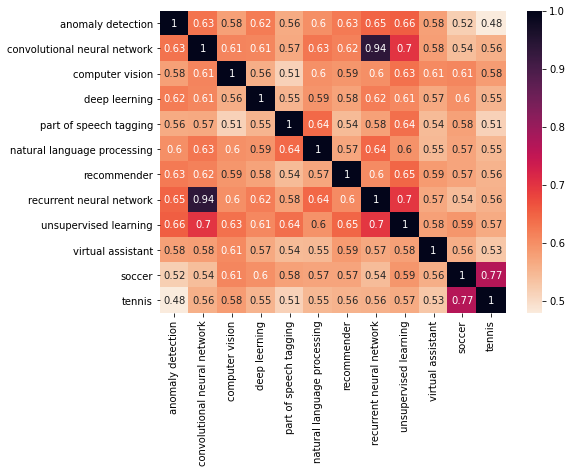

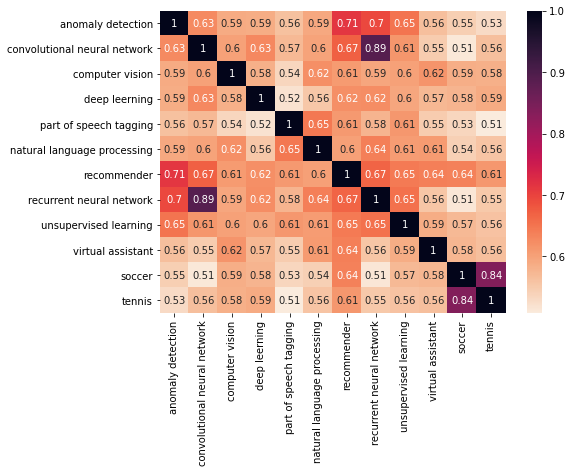

In [5]:
# terms
vec_terms4 = vectorize(terms, embed_use4)
sim_terms4 = similarity_lists(vec_terms4, vec_terms4)
heatmap(sim_terms4, terms, terms, save='01a_terms_use4.png')

vec_terms5 = vectorize(terms, embed_use5)
sim_terms5 = similarity_lists(vec_terms5, vec_terms5)
heatmap(sim_terms5, terms, terms, save='01b_terms_use5.png')

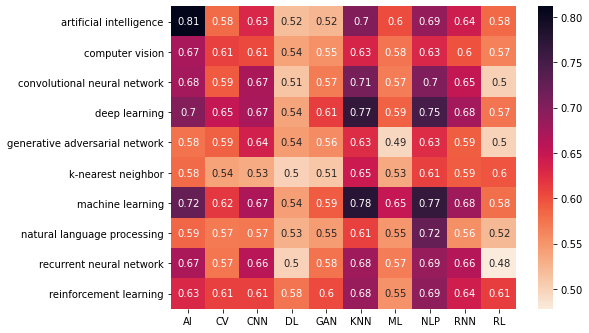

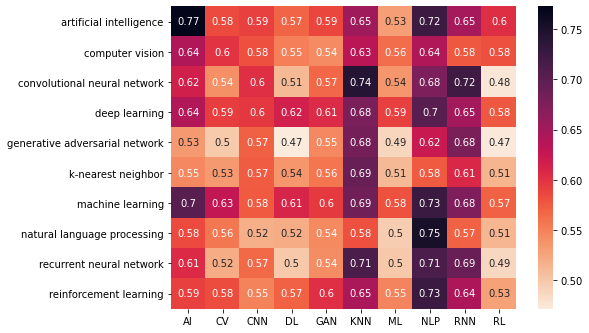

In [6]:
# terms vs abbreviations
vec_a4 = vectorize(abbreviations.keys(), embed_use4)
vec_t4 = vectorize(abbreviations.values(), embed_use4)
sim_at4 = similarity_lists(vec_a4, vec_t4)
heatmap(sim_at4, abbreviations.keys(), abbreviations.values(), save='02a_terms_vs_abbreviations_use4.png')

vec_a5 = vectorize(abbreviations.keys(), embed_use5)
vec_t5 = vectorize(abbreviations.values(), embed_use5)
sim_at5 = similarity_lists(vec_a5, vec_t5)
heatmap(sim_at5, abbreviations.keys(), abbreviations.values(), save='02b_terms_vs_abbreviations_use5.png')

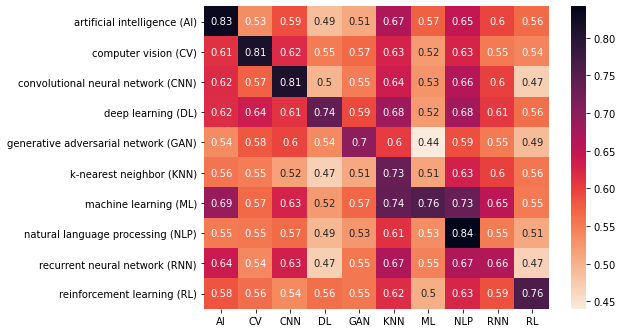

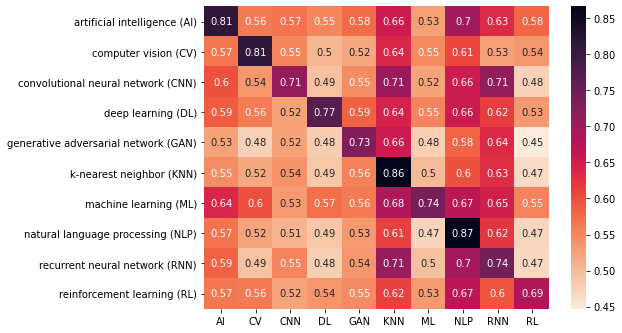

In [7]:
# abbreviations vs terms + abbreviations
list_a = abbreviations.keys()
list_b = ['{t} ({a})'.format(t=v, a=k) for k,v in abbreviations.items()]

vec_a4 = vectorize(list_a, embed_use4)
vec_t4 = vectorize(list_b, embed_use4)
sim_at4 = similarity_lists(vec_a4, vec_t4)
heatmap(sim_at4, list_a, list_b, save='03a_abbreviations_vs_combined_use4.png')

vec_a5 = vectorize(list_a, embed_use5)
vec_t5 = vectorize(list_b, embed_use5)
sim_at5 = similarity_lists(vec_a5, vec_t5)
heatmap(sim_at5, list_a, list_b, save='03b_abbreviations_vs_combined_use5.png')

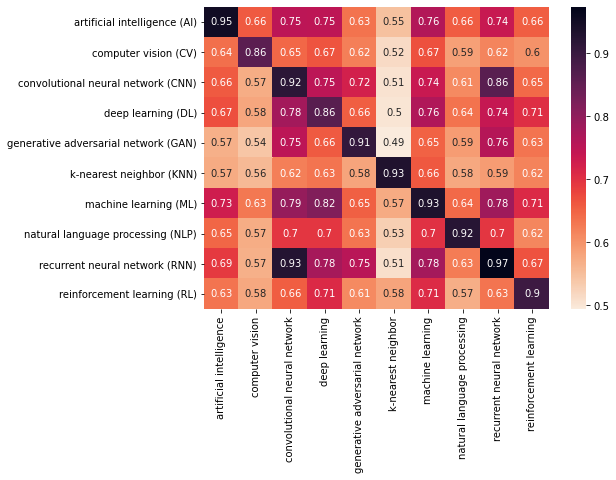

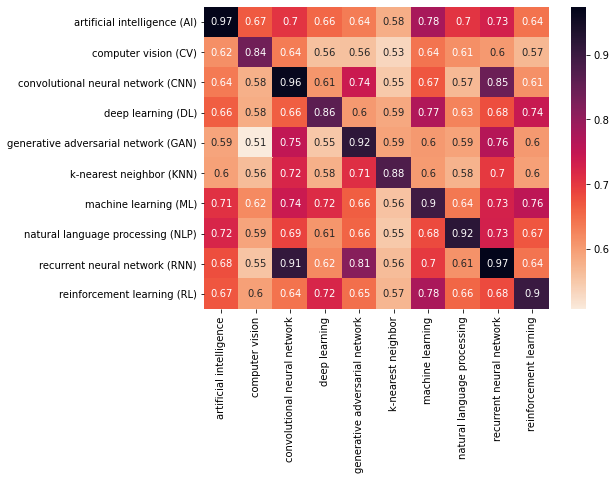

In [8]:
# terms vs terms + abbreviations
list_a = abbreviations.values()
list_b = ['{t} ({a})'.format(t=v, a=k) for k,v in abbreviations.items()]

vec_a4 = vectorize(list_a, embed_use4)
vec_t4 = vectorize(list_b, embed_use4)
sim_at4 = similarity_lists(vec_a4, vec_t4)
heatmap(sim_at4, list_a, list_b, save='04a_terms_vs_combined_use4.png')

vec_a5 = vectorize(list_a, embed_use5)
vec_t5 = vectorize(list_b, embed_use5)
sim_at5 = similarity_lists(vec_a5, vec_t5)
heatmap(sim_at5, list_a, list_b, save='04b_terms_vs_combined_use5.png')

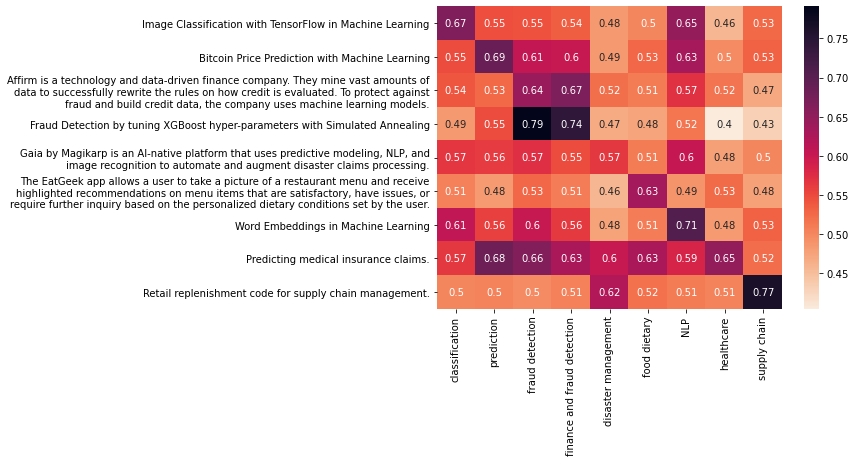

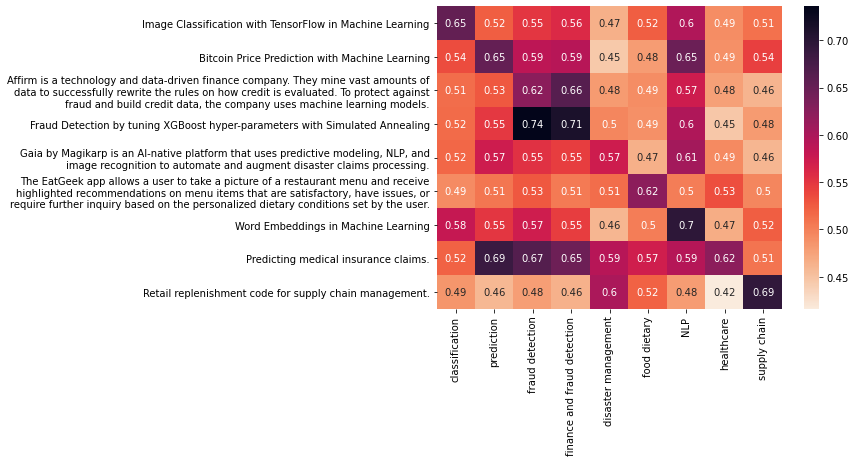

In [9]:
# terms vs description
list_a = topic_vs_titel.keys()
list_b = topic_vs_titel.values()
list_b_wrap = [text_wrap(x.replace('\n',' '), length=85) for x in list_b]

vec_a4 = vectorize(list_a, embed_use4)
vec_b4 = vectorize(list_b, embed_use4)
sim_at4 = similarity_lists(vec_a4, vec_b4)
heatmap(sim_at4, list_a, list_b_wrap, save='05a_terms_vs_description_use4.png')

vec_a5 = vectorize(list_a, embed_use5)
vec_b5 = vectorize(list_b, embed_use5)
sim_at5 = similarity_lists(vec_a5, vec_b5)
heatmap(sim_at5, list_a, list_b_wrap, save='05b_terms_vs_description_use5.png')

In [10]:
# some similarities
print('USE 4')
embed = embed_use4
similarity_words('picture', 'image', embed)
similarity_words('NLP fashion', 'Covid 19 week report', embed)
similarity_words('fashion', 'week', embed)
similarity_words('chatbot', 'nlp', embed)
similarity_words('chatbot', 'natural language processing', embed)
similarity_words('machine learning', 'nature', embed)
similarity_words('snow', 'moon', embed)
similarity_words('vulcano', 'clown', embed)

print('USE 5')
embed = embed_use5
similarity_words('picture', 'image', embed)
similarity_words('NLP fashion', 'Covid 19 week report', embed)
similarity_words('fashion', 'week', embed)
similarity_words('chatbot', 'nlp', embed)
similarity_words('chatbot', 'natural language processing', embed)
similarity_words('machine learning', 'nature', embed)
similarity_words('snow', 'moon', embed)
similarity_words('vulcano', 'clown', embed)

USE 4
picture / image : 0.937
NLP fashion / Covid 19 week report : 0.479
fashion / week : 0.599
chatbot / nlp : 0.736
chatbot / natural language processing : 0.692
machine learning / nature : 0.554
snow / moon : 0.709
vulcano / clown : 0.578
USE 5
picture / image : 0.907
NLP fashion / Covid 19 week report : 0.557
fashion / week : 0.663
chatbot / nlp : 0.852
chatbot / natural language processing : 0.723
machine learning / nature : 0.589
snow / moon : 0.728
vulcano / clown : 0.669


0.669

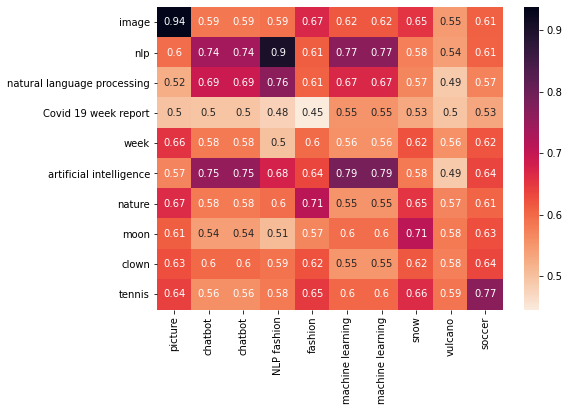

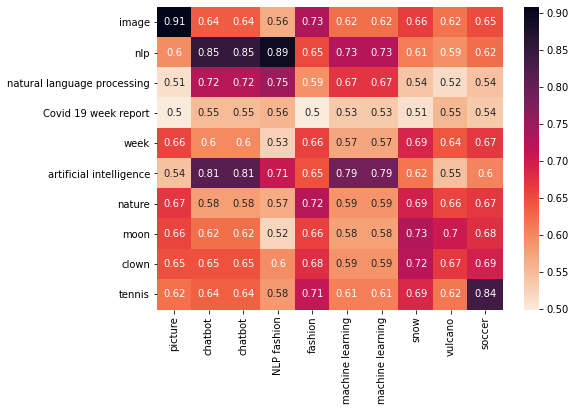

In [11]:
# some similarities
list_a = [
    'picture',
    'chatbot',
    'chatbot',
    'NLP fashion',
    'fashion',
    'machine learning',
    'machine learning',
    'snow',
    'vulcano',
    'soccer'
]
list_b = [
    'image',
    'nlp',
    'natural language processing',
    'Covid 19 week report',
    'week',
    'artificial intelligence',
    'nature',
    'moon',
    'clown',
    'tennis'
]

vec_a4 = vectorize(list_a, embed_use4)
vec_b4 = vectorize(list_b, embed_use4)
sim_at4 = similarity_lists(vec_a4, vec_b4)
heatmap(sim_at4, list_a, list_b, save='06a_words_use4.png')

vec_a5 = vectorize(list_a, embed_use5)
vec_b5 = vectorize(list_b, embed_use5)
sim_at5 = similarity_lists(vec_a5, vec_b5)
heatmap(sim_at5, list_a, list_b, save='06b_words_use5.png')

In [38]:
# medium articles
title = [
    'I Asked GPT-3 to Write a Sea Shanty About Biden’s Inauguration',
    'Identifying Faces with MTCNN and VggFace',
    'A simple overview of RNN, LSTM and Attention Mechanism',
    'A Bayesian Take On Model Regularization',
    '6 ways AI and machine learning are revolutionizing marketing and sales',
    'Review — SNE: Stochastic Neighbor Embedding (Data Visualization)',
    'This Atom Is So Critical to Deep Learning',
    'Image Similarity: Theory and Code',
    'Image Processing with Python: Image Segmentation using Thresholding Methods',
    'Image Processing with Python: Image Effects using Convolutional Filters and Kernels'
]
description = [
    '‘So we’ll raise a glass of rum, to Joe Biden’s inauguration’',
    'Face Verification is a task of identifying a person by using a source such as an image,video,\n or a camera feed of their face. There are various methods of face verification,\n depending on how we analyse and extract features and facial patterns from an image.',
    'Recurrent Neural Networks, Long Short Term Memory and the famous Attention based approach explained.',
    'In this article, we explore how we can, and do, regularize and control the complexity of the models\n we learn through Bayesian prior beliefs.',
    'Artificial Intelligence (AI) is currently being used in marketing and sales for all sorts\n of processes from personalized shopping to warehouse logistics.',
    'High-Dimensional Data Mapping to Low-Dimensional Space',
    'Upgrade your understanding of artificial intelligence.',
    'A heuristic for computing similarity in unstructured image data.',
    'How to pinpoint and segment objects based on their color channels?',
    'How to blur, sharpen, outline, or emboss a digital image?',
]
tags = [
    'Artificial Intelligence, Machine Learning,\nTechnology, Culture,\nTik Tok',
    'Facedetection, Deep Learning, Data Science,\nComputer Vision, Machine Learning',
    'Deep Learning, Attention Mechanism,\nArtificial Intelligence, Machine Learning,\nRecurrent Neural Network',
    'Artificial Intelligence, Machine Learning,\nLearning, AI, Statistics',
    'AI, Machine Learning,\nMarketing, Sales',
    'Deep Learning, Artificial Intelligence,\nData Visualization, Dimensionality Reduction,\nData Science',
    'Artificial Intelligence, Deep Learning,\nData Science, Pineapple2021,\nMachine Learning',
    'Deep Learning, Pytorch,\nPets, Similarity, Fastai',
    'Image Processing, Python,\nComputer Vision, Data Science',
    'Image Processing, Python,\nComputer Vision, Data Science',
]
tags_cleaned = [
    'Technology, Culture, Tik Tok',
    'Facedetection, Deep Learning, Data Science, Computer Vision',
    'Deep Learning, Attention Mechanism, Recurrent Neural Network',
    'Statistics',
    'Marketing, Sales',
    'Deep Learning, Data Visualization, Dimensionality Reduction, Data Science',
    'Deep Learning, Data Science, Pineapple2021',
    'Deep Learning, Pytorch, Pets, Similarity, Fastai',
    'Image Processing, Python, Computer Vision, Data Science',
    'Image Processing, Python, Computer Vision, Data Science',
]
category = [
    'text generation',
    'identify faces',
    'memorize text',
    'regularization',
    'marketing and sales',
    'dimension conversion and data visualization',
    'understanding artificial intelligence',
    'computer vision',
    'image processing',
    'image processing',
]

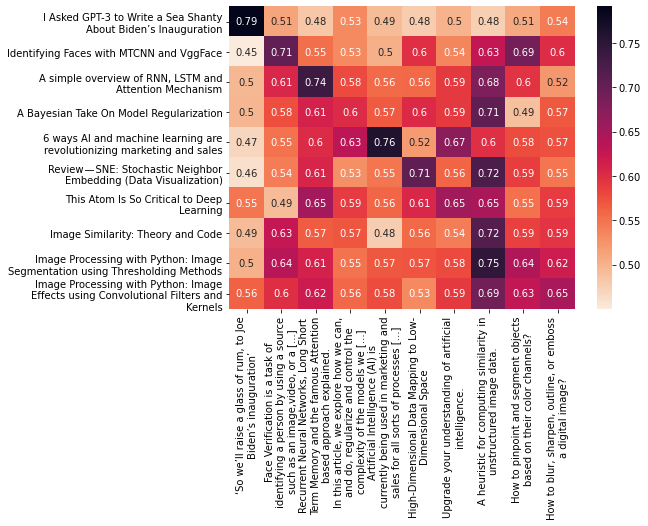

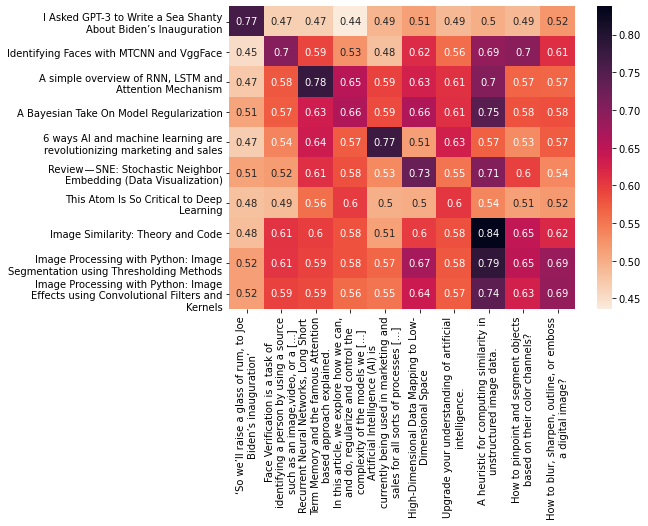

In [13]:
# medium title vs description
list_b = title
list_a = description
list_b_wrap = [text_wrap(x.replace('\n',' '), length=40) for x in list_b]
list_a_wrap = [text_wrap(x.replace('\n',' '), length=40, limit=110) for x in list_a]

vec_a4 = vectorize(list_a, embed_use4)
vec_b4 = vectorize(list_b, embed_use4)
sim_at4 = similarity_lists(vec_a4, vec_b4)
heatmap(sim_at4, list_a_wrap, list_b_wrap, save='07a_medium_title_vs_description_use4.png')

vec_a5 = vectorize(list_a, embed_use5)
vec_b5 = vectorize(list_b, embed_use5)
sim_at5 = similarity_lists(vec_a5, vec_b5)
heatmap(sim_at5, list_a_wrap, list_b_wrap, save='07b_medium_title_vs_description_use5.png')

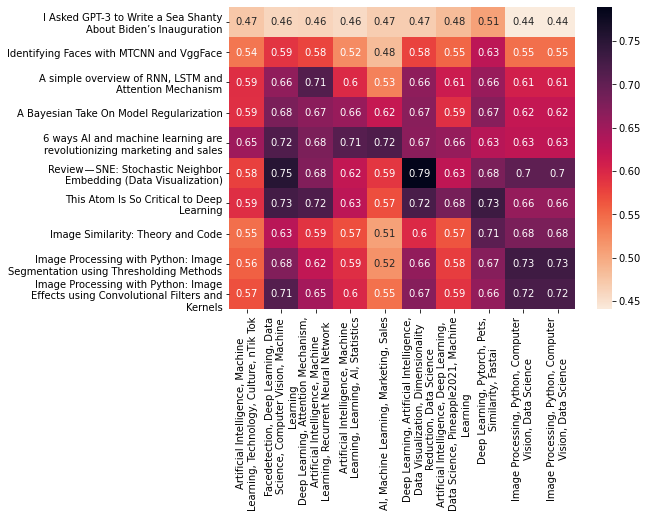

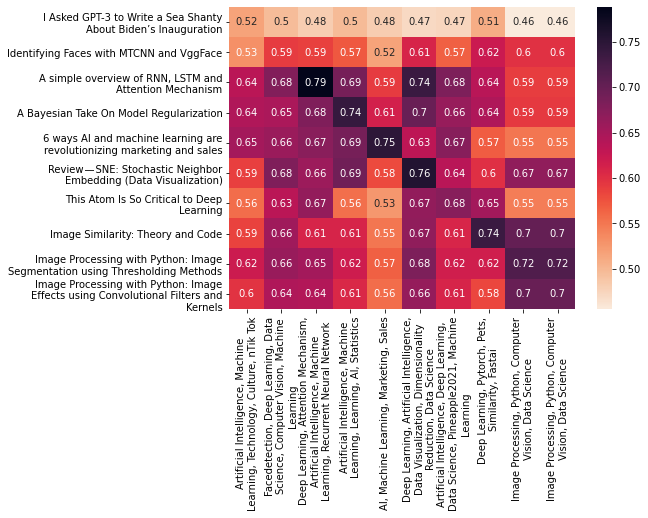

In [14]:
# medium title vs tags
list_b = title
list_a = tags
list_b_wrap = [text_wrap(x.replace('\n',' '), length=40) for x in list_b]
list_a_wrap = [text_wrap(x.replace('\n',' '), length=40, limit=110) for x in list_a]

vec_a4 = vectorize(list_a, embed_use4)
vec_b4 = vectorize(list_b, embed_use4)
sim_at4 = similarity_lists(vec_a4, vec_b4)
heatmap(sim_at4, list_a_wrap, list_b_wrap, save='08a_medium_title_vs_tags_use4.png')

vec_a5 = vectorize(list_a, embed_use5)
vec_b5 = vectorize(list_b, embed_use5)
sim_at5 = similarity_lists(vec_a5, vec_b5)
heatmap(sim_at5, list_a_wrap, list_b_wrap, save='08b_medium_title_vs_tags_use5.png')

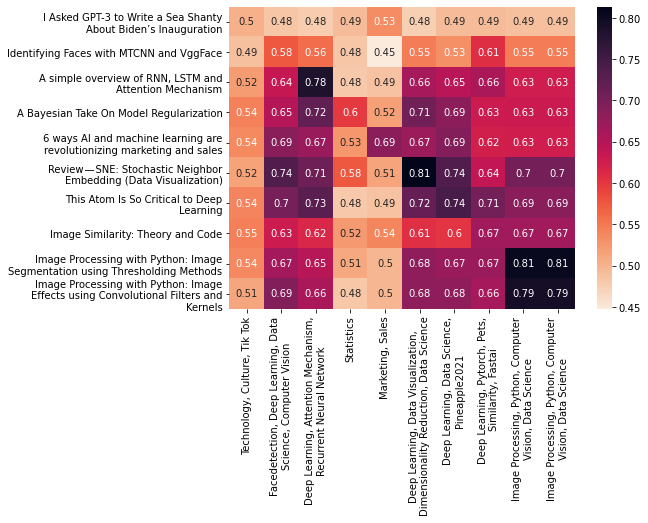

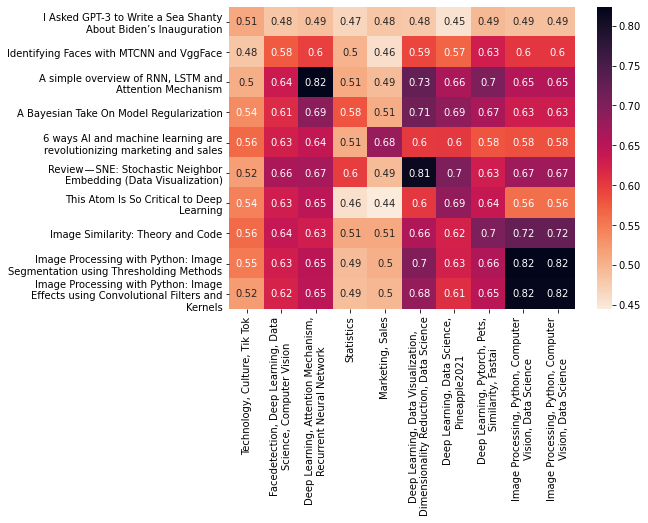

In [40]:
# medium title vs tags cleaned
list_b = title
list_a = tags_cleaned
list_b_wrap = [text_wrap(x.replace('\n',' '), length=40) for x in list_b]
list_a_wrap = [text_wrap(x.replace('\n',' '), length=40, limit=110) for x in list_a]

vec_a4 = vectorize(list_a, embed_use4)
vec_b4 = vectorize(list_b, embed_use4)
sim_at4 = similarity_lists(vec_a4, vec_b4)
heatmap(sim_at4, list_a_wrap, list_b_wrap, save='08c_medium_title_vs_tags_cleaned_use4.png')

vec_a5 = vectorize(list_a, embed_use5)
vec_b5 = vectorize(list_b, embed_use5)
sim_at5 = similarity_lists(vec_a5, vec_b5)
heatmap(sim_at5, list_a_wrap, list_b_wrap, save='08d_medium_title_vs_tags_cleaned_use5.png')

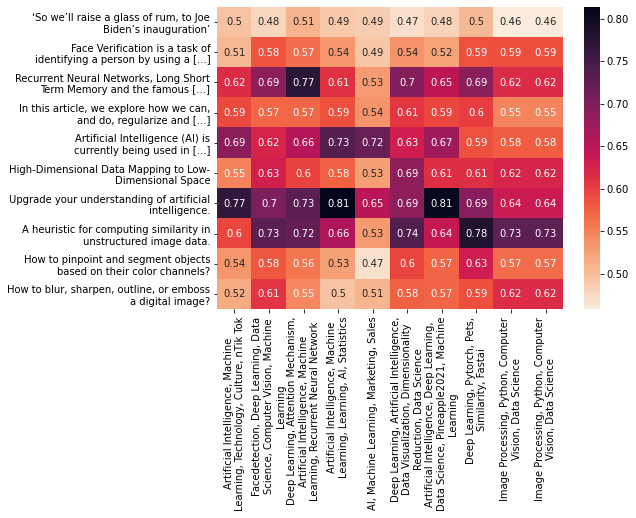

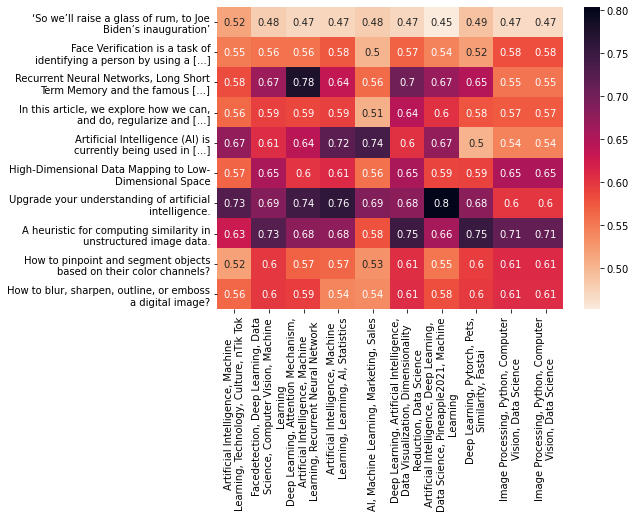

In [20]:
# medium description vs tags
list_b = description
list_a = tags
list_b_wrap = [text_wrap(x.replace('\n',' '), length=40, limit=70) for x in list_b]
list_a_wrap = [text_wrap(x.replace('\n',' '), length=40, limit=110) for x in list_a]

vec_a4 = vectorize(list_a, embed_use4)
vec_b4 = vectorize(list_b, embed_use4)
sim_at4 = similarity_lists(vec_a4, vec_b4)
heatmap(sim_at4, list_a_wrap, list_b_wrap, save='09a_medium_description_vs_tags_use4.png')

vec_a5 = vectorize(list_a, embed_use5)
vec_b5 = vectorize(list_b, embed_use5)
sim_at5 = similarity_lists(vec_a5, vec_b5)
heatmap(sim_at5, list_a_wrap, list_b_wrap, save='09b_medium_description_vs_tags_use5.png')

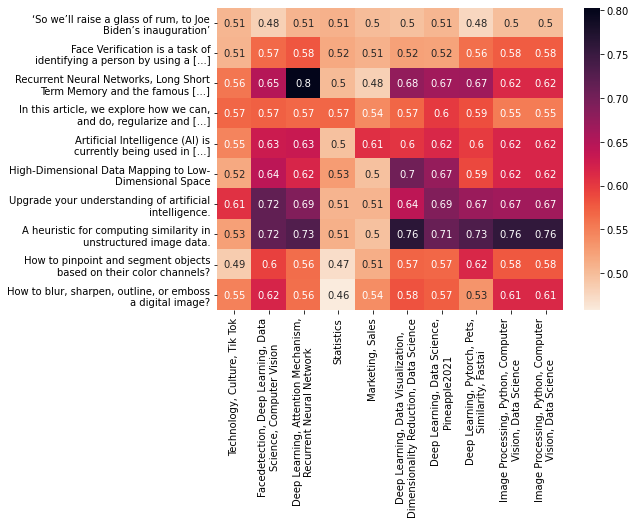

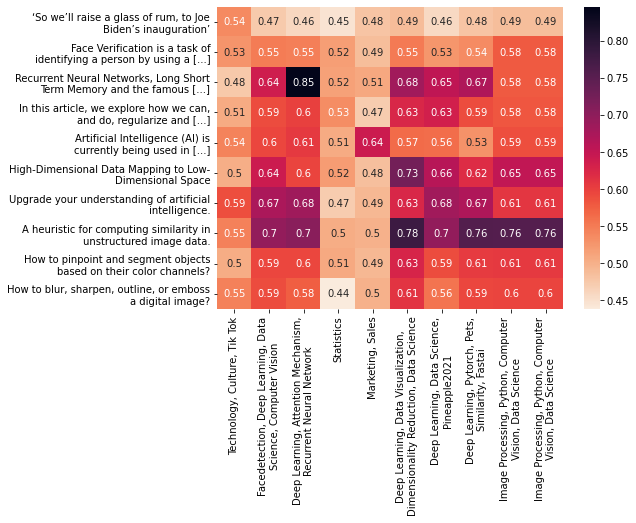

In [39]:
# medium description vs tags cleaned
list_b = description
list_a = tags_cleaned
list_b_wrap = [text_wrap(x.replace('\n',' '), length=40, limit=70) for x in list_b]
list_a_wrap = [text_wrap(x.replace('\n',' '), length=40, limit=110) for x in list_a]

vec_a4 = vectorize(list_a, embed_use4)
vec_b4 = vectorize(list_b, embed_use4)
sim_at4 = similarity_lists(vec_a4, vec_b4)
heatmap(sim_at4, list_a_wrap, list_b_wrap, save='09c_medium_description_vs_tags_cleaned_use4.png')

vec_a5 = vectorize(list_a, embed_use5)
vec_b5 = vectorize(list_b, embed_use5)
sim_at5 = similarity_lists(vec_a5, vec_b5)
heatmap(sim_at5, list_a_wrap, list_b_wrap, save='09d_medium_description_vs_tags_cleaned_use5.png')

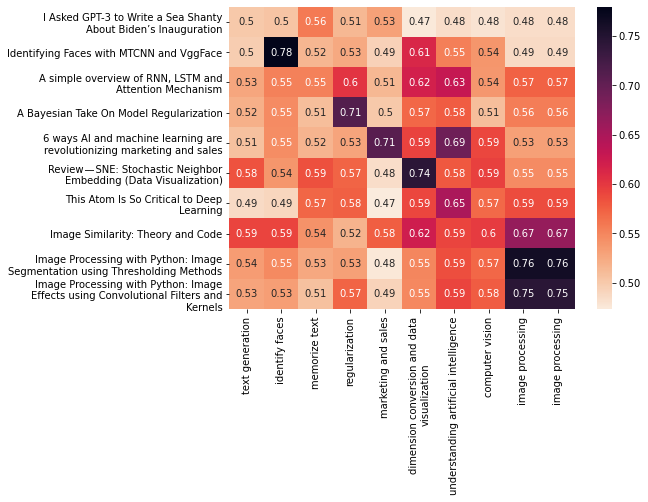

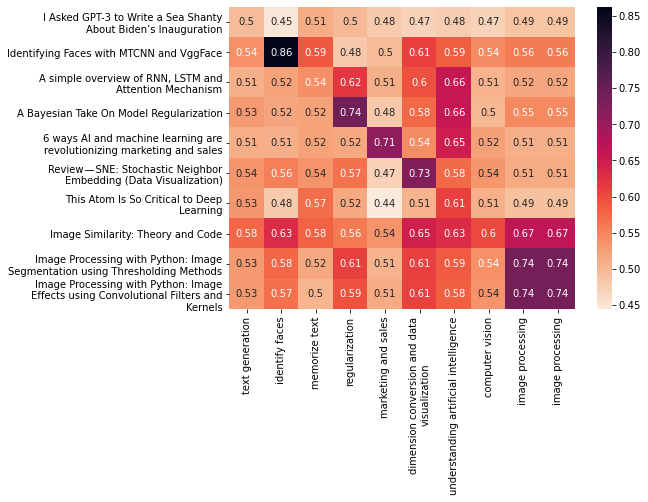

In [33]:
# medium title vs category
list_b = title
list_a = category
list_b_wrap = [text_wrap(x.replace('\n',' '), length=40) for x in list_b]
list_a_wrap = [text_wrap(x.replace('\n',' '), length=40, limit=110) for x in list_a]

vec_a4 = vectorize(list_a, embed_use4)
vec_b4 = vectorize(list_b, embed_use4)
sim_at4 = similarity_lists(vec_a4, vec_b4)
heatmap(sim_at4, list_a_wrap, list_b_wrap, save='10a_medium_title_vs_category_use4.png')

vec_a5 = vectorize(list_a, embed_use5)
vec_b5 = vectorize(list_b, embed_use5)
sim_at5 = similarity_lists(vec_a5, vec_b5)
heatmap(sim_at5, list_a_wrap, list_b_wrap, save='10b_medium_title_vs_category_use5.png')

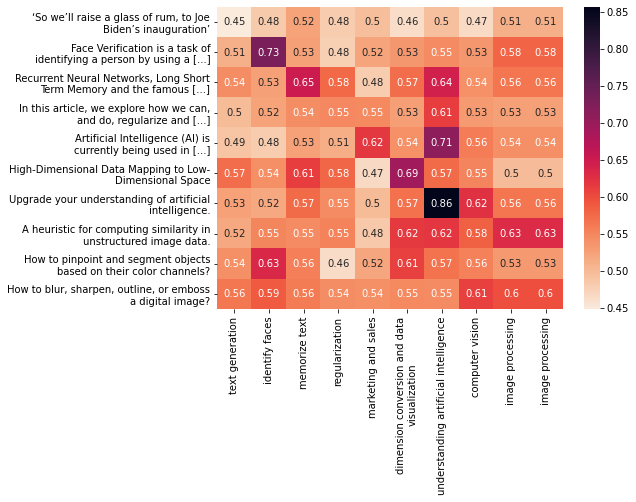

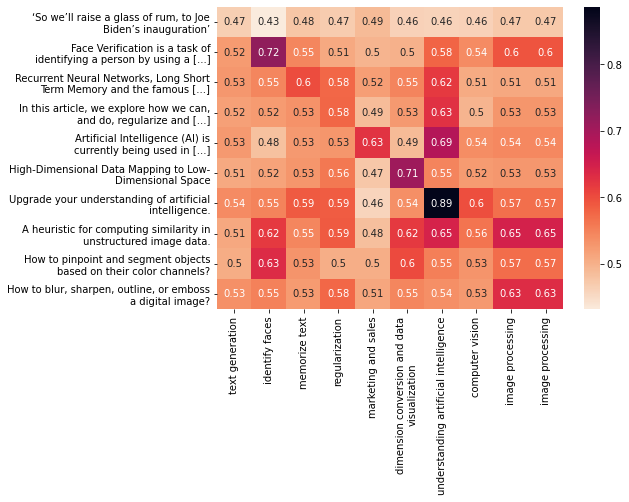

In [34]:
# medium description vs category
list_b = description
list_a = category
list_b_wrap = [text_wrap(x.replace('\n',' '), length=40, limit=70) for x in list_b]
list_a_wrap = [text_wrap(x.replace('\n',' '), length=40, limit=110) for x in list_a]

vec_a4 = vectorize(list_a, embed_use4)
vec_b4 = vectorize(list_b, embed_use4)
sim_at4 = similarity_lists(vec_a4, vec_b4)
heatmap(sim_at4, list_a_wrap, list_b_wrap, save='11a_medium_description_vs_category_use4.png')

vec_a5 = vectorize(list_a, embed_use5)
vec_b5 = vectorize(list_b, embed_use5)
sim_at5 = similarity_lists(vec_a5, vec_b5)
heatmap(sim_at5, list_a_wrap, list_b_wrap, save='11b_medium_description_vs_category_use5.png')

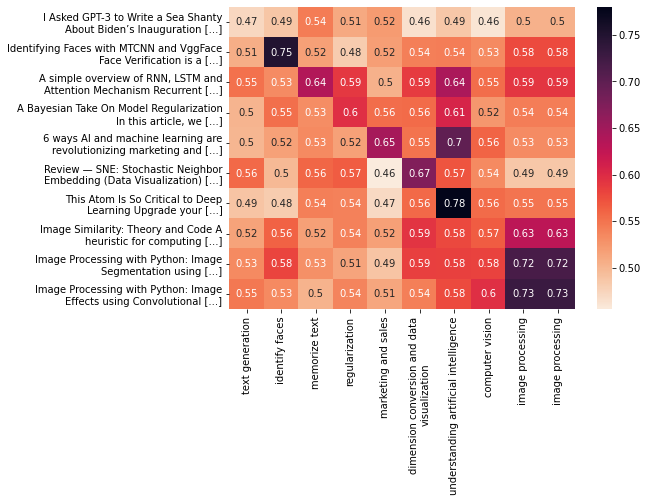

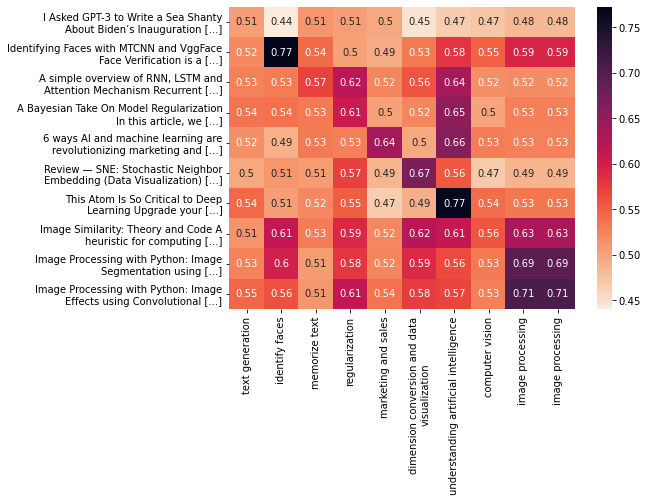

In [35]:
# medium title+description vs category
list_b = [i + '\n'+ j for i, j in zip(title, description)]
list_a = category
list_b_wrap = [text_wrap(x.replace('\n',' '), length=40, limit=70) for x in list_b]
list_a_wrap = [text_wrap(x.replace('\n',' '), length=40, limit=110) for x in list_a]

vec_a4 = vectorize(list_a, embed_use4)
vec_b4 = vectorize(list_b, embed_use4)
sim_at4 = similarity_lists(vec_a4, vec_b4)
heatmap(sim_at4, list_a_wrap, list_b_wrap, save='12a_medium_t+d_vs_category_use4.png')

vec_a5 = vectorize(list_a, embed_use5)
vec_b5 = vectorize(list_b, embed_use5)
sim_at5 = similarity_lists(vec_a5, vec_b5)
heatmap(sim_at5, list_a_wrap, list_b_wrap, save='12b_medium_t+d_vs_category_use5.png')

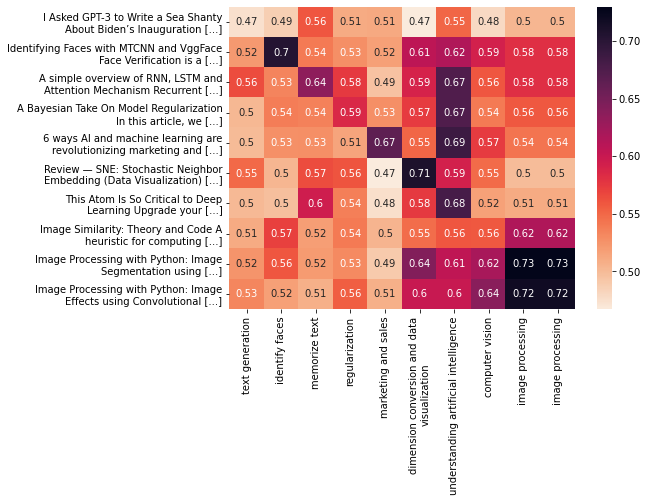

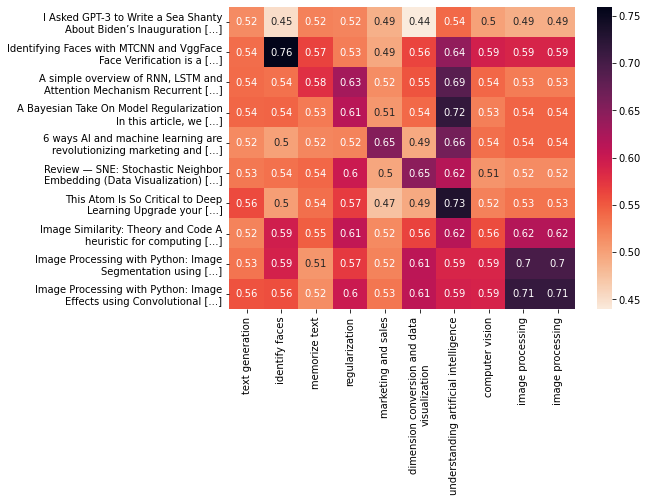

In [36]:
# medium title+description+tags vs category
list_b = [i + '\n'+ j + '\n'+ k for i, j, k in zip(title, description, tags)]
list_a = category
list_b_wrap = [text_wrap(x.replace('\n',' '), length=40, limit=70) for x in list_b]
list_a_wrap = [text_wrap(x.replace('\n',' '), length=40, limit=110) for x in list_a]

vec_a4 = vectorize(list_a, embed_use4)
vec_b4 = vectorize(list_b, embed_use4)
sim_at4 = similarity_lists(vec_a4, vec_b4)
heatmap(sim_at4, list_a_wrap, list_b_wrap, save='13a_medium_t+d+tags_vs_category_use4.png')

vec_a5 = vectorize(list_a, embed_use5)
vec_b5 = vectorize(list_b, embed_use5)
sim_at5 = similarity_lists(vec_a5, vec_b5)
heatmap(sim_at5, list_a_wrap, list_b_wrap, save='13b_medium_t+d+tags_vs_category_use5.png')